In [50]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import re
import random
import seaborn as sns
import scipy

In [5]:
gc_dict = {}
for gcfile in glob.glob("counts/*tsv"):
    aligner = gcfile.split('_')[2]
    name = gcfile.split('_')[3]
    df = pd.read_csv(gcfile, sep='\t', index_col=0)
    cols = df.columns
    newcol = []
    for c in cols:
        nc = re.findall('SRR[0-9]{7}', c)[0]
        newcol.append(nc)
    df.columns=newcol  
    
    print(aligner, len(df))
    if aligner in gc_dict.keys():
        gc_dict[aligner].append(df)
    else:
        gc_dict[aligner]=[df]

bowtie2 59308
bowtie2 59304
bowtie2 59306
bwa 59303
bwa 59309
bwa 59305
kallisto 59353
kallisto 59353
salmon 59353
salmon 59353
salmon 59353


In [9]:
n=1000
rands = random.sample(range(59000), n)
rand_index = gc_dict['salmon'][0].index[rands]
SRRs = ['SRR5004097',  'SRR5004082',  'SRR5004085',  'SRR5004083']


Text(0.5, 0.98, 'salmon')

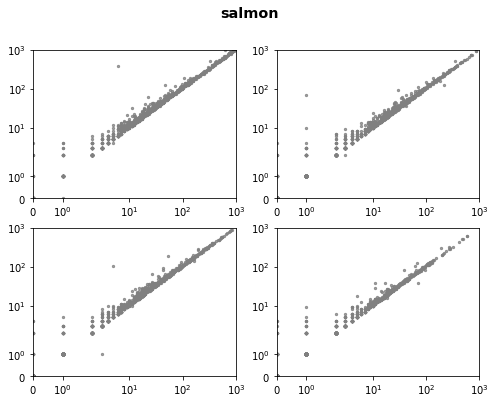

In [66]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'salmon'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5, color='gray')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)
    
fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


Text(0.5,0.98,'bwa')

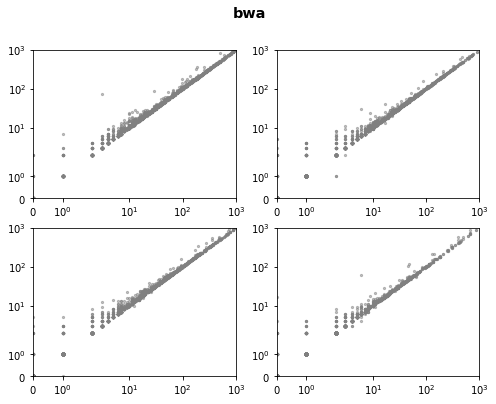

In [230]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'bwa'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5, color='gray')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)

fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


Text(0.5,0.98,'bowtie2')

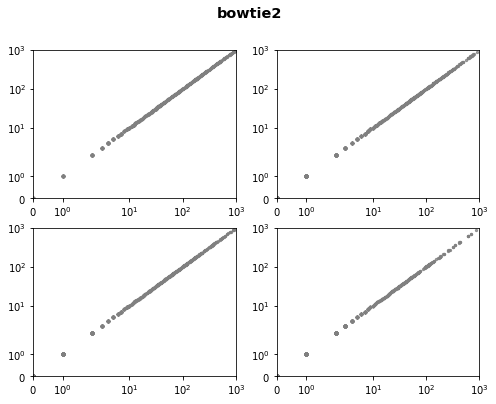

In [231]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'bowtie2'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5, color='gray')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)

fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


Text(0.5,0.98,'kallisto')

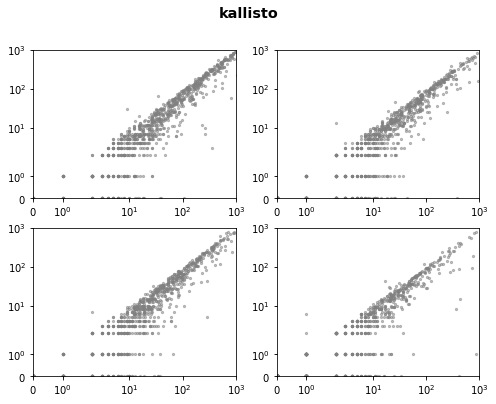

In [232]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'kallisto'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5, color='gray')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)

fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


In [76]:
SRR = 'SRR5004097'
combo_df = pd.DataFrame(columns=gc_dict.keys())
for key in gc_dict.keys():
    sc = gc_dict[key][0][SRR]
    combo_df[key]=sc
# d1=pd.DataFrame(x.loc[rand_index, SRR])
# d1.columns=['d1']
# d2=pd.DataFrame(y.loc[rand_index, SRR])
# d1['d2']=d2
# sns.scatterplot(x=[1], y=[2],data=d1)
#         p=sns.regplot(data=d1, x='d1', y='d2', ax = ax)
#         slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
#     print(slope,r_value)



In [84]:
combo_unstack = combo_df.unstack()

In [87]:
combo_unstack = combo_unstack.reset_index().set_index('Contig')

/Users/halexand/anaconda3/envs/python_lab/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/halexand/anaconda3/envs/python_lab/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


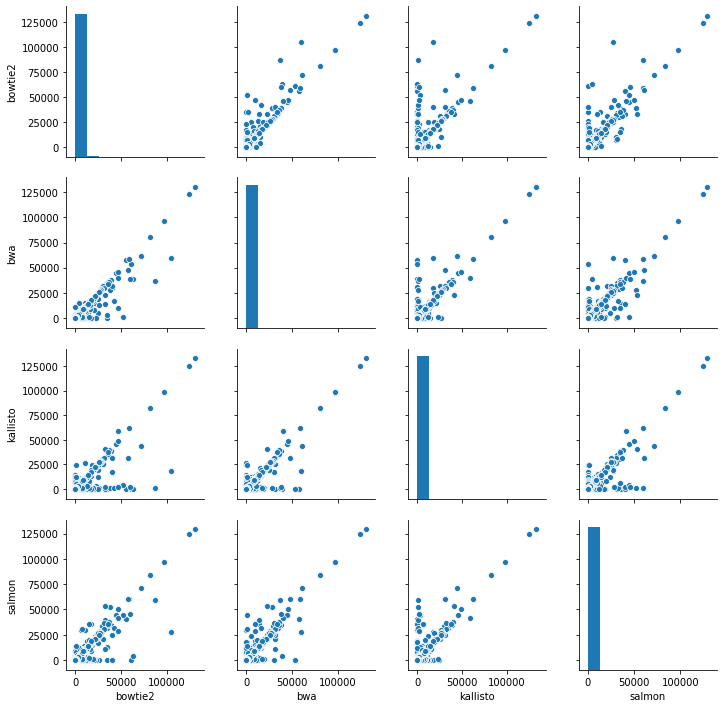

In [90]:
sns.pairplot(combo_df)